In [2]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [3]:
#read in data
boxmojo = pd.read_csv('boxmojo_db.csv')
country_budget = pd.read_csv('country_production_budgets.csv')

In [3]:
boxmojo

,Market,Release Date,Opening,Gross,title,Actor 1,Actor 2,Actor 3,Actor 4
0,Austria,"Apr 24, 2019","$3,563,042","$8,376,632",Avengers: Endgame,Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chris Hemsworth
1,Belgium,"Apr 24, 2019","$3,141,578","$8,682,740",Avengers: Endgame,Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chris Hemsworth
2,Bulgaria,"Apr 26, 2019","$442,037","$1,469,984",Avengers: Endgame,Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chris Hemsworth
3,Croatia,"Apr 25, 2019","$545,732","$1,144,369",Avengers: Endgame,Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chris Hemsworth
4,Czech Republic,"Apr 25, 2019","$2,534,713","$6,610,971",Avengers: Endgame,Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chris Hemsworth
...,...,...,...,...,...,...,...,...,...
84324,Germany,"May 4, 2000","$243,071","$243,071",Being John Malkovich,John Cusack,Cameron Diaz,Catherine Keener,John Malkovich
84325,Germany,"Mar 23, 2000","$266,454","$266,454",Snow Falling on Cedars,Ethan Hawke,Max von Sydow,Yûki Kudô,Reeve Carney
84326,Italy,"Jun 9, 2000",–,"$5,026",Drive Me Crazy,Melissa Joan Hart,Adrian Grenier,Stephen Collins,Mark Metcalf
84327,South Korea,"Jan 1, 2020","$59,684","$286,401",The Legend of 1900,Tim Roth,Pruitt Taylor Vince,Mélanie Thierry,Bill Nunn


In [4]:
country_budget

,Country,No. Movies,Average Production Budget,Total Worldwide Box Office
0,United States,"18,622","$36,716,146","$580,689,005,849"
1,United Kingdom,"3,145","$30,346,413","$51,120,521,276"
2,China,"1,684","$31,727,059","$29,938,351,771"
3,France,"2,753","$23,007,232","$20,056,093,851"
4,Japan,"1,158","$29,453,636","$13,175,249,342"
...,...,...,...,...
164,Kiribati,1,$0,$0
165,Isle of Man,1,$0,$0
166,Honduras,1,$0,$0
167,Belize,1,$0,$0


In [5]:
#cleans boxmojo gross column
boxmojo['Gross'] = boxmojo['Gross'].str.replace(',', '').str.replace('$', '')
boxmojo['Gross'] = boxmojo['Gross'].apply(pd.to_numeric,errors = 'coerce')
#drop na values
boxmojo.dropna(inplace = True) 

In [7]:
boxmojo

,Market,Release Date,Opening,Gross,title,Actor 1,Actor 2,Actor 3,Actor 4
0,Austria,"Apr 24, 2019","$3,563,042",8376632.0,Avengers: Endgame,Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chris Hemsworth
1,Belgium,"Apr 24, 2019","$3,141,578",8682740.0,Avengers: Endgame,Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chris Hemsworth
2,Bulgaria,"Apr 26, 2019","$442,037",1469984.0,Avengers: Endgame,Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chris Hemsworth
3,Croatia,"Apr 25, 2019","$545,732",1144369.0,Avengers: Endgame,Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chris Hemsworth
4,Czech Republic,"Apr 25, 2019","$2,534,713",6610971.0,Avengers: Endgame,Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chris Hemsworth
...,...,...,...,...,...,...,...,...,...
84324,Germany,"May 4, 2000","$243,071",243071.0,Being John Malkovich,John Cusack,Cameron Diaz,Catherine Keener,John Malkovich
84325,Germany,"Mar 23, 2000","$266,454",266454.0,Snow Falling on Cedars,Ethan Hawke,Max von Sydow,Yûki Kudô,Reeve Carney
84326,Italy,"Jun 9, 2000",–,5026.0,Drive Me Crazy,Melissa Joan Hart,Adrian Grenier,Stephen Collins,Mark Metcalf
84327,South Korea,"Jan 1, 2020","$59,684",286401.0,The Legend of 1900,Tim Roth,Pruitt Taylor Vince,Mélanie Thierry,Bill Nunn


In [6]:
# #clean string total Worldwide Box Office to ints. Errors mean already cleaned
country_budget['Total Worldwide Box Office'] = country_budget['Total Worldwide Box Office'].str.replace(',', '').str.replace('$', '')
country_budget['Total Worldwide Box Office'] = country_budget['Total Worldwide Box Office'].apply(pd.to_numeric,errors = 'coerce')
#clean no.movies to ints. Errors mean already cleaned
country_budget['No. Movies'] = country_budget['No. Movies'].str.replace(',', '').str.replace('$', '')
country_budget['No. Movies'] = country_budget['No. Movies'].apply(pd.to_numeric,errors = 'coerce')
#clean string No. Movies to ints
country_budget['Average Production Budget'] = country_budget['Average Production Budget'].str.replace(',', '').str.replace('$', '')
country_budget['Average Production Budget'] = country_budget['Average Production Budget'].apply(pd.to_numeric,errors = 'coerce')

In [8]:
country_budget

,Country,No. Movies,Average Production Budget,Total Worldwide Box Office
0,United States,18622,36716146,580689005849
1,United Kingdom,3145,30346413,51120521276
2,China,1684,31727059,29938351771
3,France,2753,23007232,20056093851
4,Japan,1158,29453636,13175249342
...,...,...,...,...
164,Kiribati,1,0,0
165,Isle of Man,1,0,0
166,Honduras,1,0,0
167,Belize,1,0,0


# Obtaining introductory graph
1. Select data and create dataframe and calculate avereage worldwide.
2. Plot Country vs Average Budget
3. Plot Country vs Average Worldwide Revenue

In [7]:
# clean no. of movies to get list of non-US countries
intro_df = country_budget
intro_df['Average Worldwide'] = intro_df['Total Worldwide Box Office']/intro_df['No. Movies']
intro_df.sort_values(by = 'Average Production Budget', ascending = False)
intro_df = intro_df[:20]
intro_df = intro_df.sort_values(by = 'Average Production Budget',ascending = False)
intro_df

,Country,No. Movies,Average Production Budget,Total Worldwide Box Office,Average Worldwide
0,United States,18622,36716146,580689005849,3.118296e+07
2,China,1684,31727059,29938351771,1.777812e+07
5,Germany,1207,30993014,9996096877,8.281770e+06
1,United Kingdom,3145,30346413,51120521276,1.625454e+07
7,Australia,612,29924645,7383954399,1.206528e+07
4,Japan,1158,29453636,13175249342,1.137759e+07
15,Netherlands,359,26526667,1173249903,3.268106e+06
9,Hong Kong,355,24750000,6387409143,1.799270e+07
11,Spain,1006,24701437,3938872805,3.915381e+06
3,France,2753,23007232,20056093851,7.285178e+06


In [8]:
#store country in x, budget in y1 for x vs y1
x = intro_df['Country'].values
y1 = (intro_df['Average Production Budget'].values)/1000000

#store country in x, budget in y2 for x vs y2
y2 = intro_df['Average Worldwide']/1000000

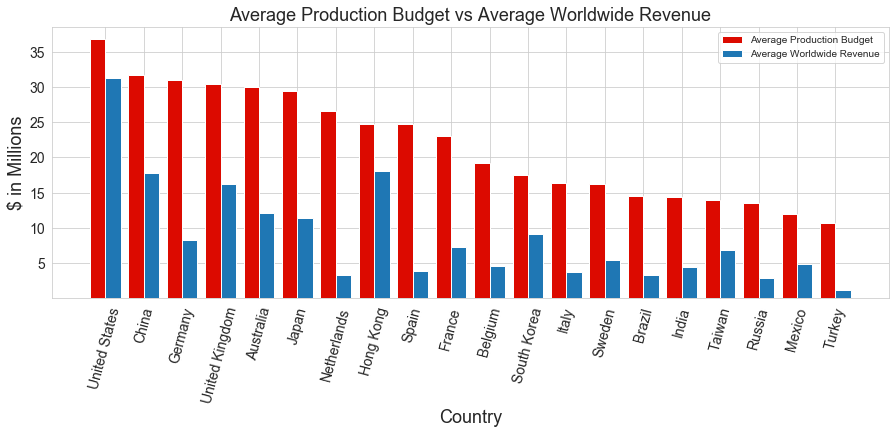

In [27]:
#graph data
sns.set_style('whitegrid')
fig,ax = plt.subplots(figsize = (15,5))

_x = np.arange(len(x)) #space out countries for plotting 

#plots
ax.bar(_x - 0.2, y1, 0.4, color = '#DC0A00')  #adjust plot to left/right
ax.bar(_x + 0.2, y2, 0.4)

#axis ticks
plt.xticks(_x, x) 
plt.yticks([5,10,15,20,25,30,35])

#axis labels
plt.xlabel('Country')
plt.ylabel('$ in Millions')

#fonts
# plt.rc('font', size = 14)
plt.rc('axes', titlesize=18, )     # fontsize of the axes title
plt.rc('axes', labelsize= 18)  # fontsize of the x and y labels
plt.rc('xtick', labelsize = 14)    # fontsize of the tick labels
plt.rc('ytick', labelsize = 14)

#more formatting
plt.xticks(rotation = 75)
plt.legend(['Average Production Budget','Average Worldwide Revenue'])
plt.title('Average Production Budget vs Average Worldwide Revenue')
plt.show()

# Graph which foriegn country revenue stream is greatest
1. Select top 20 countries since at 20th mark there is a noticeable drop in revenue
2. Get gross sum and gross count from scraped data and put into dataframe
3. Merge with top 20 countries 

In [12]:
#create country budget frame for future merge
country_budget = country_budget.drop(['Total Worldwide Box Office'],axis = 1)
country_budget_df = country_budget[2:22]
country_budget_df

,Country,No. Movies,Average Production Budget,Average Worldwide
2,China,1684,31727059,1.777812e+07
3,France,2753,23007232,7.285178e+06
4,Japan,1158,29453636,1.137759e+07
5,Germany,1207,30993014,8.281770e+06
6,South Korea,880,17430208,9.112933e+06
7,Australia,612,29924645,1.206528e+07
8,India,1647,14424796,4.461234e+06
9,Hong Kong,355,24750000,1.799270e+07
10,Italy,1131,16391000,3.689684e+06
11,Spain,1006,24701437,3.915381e+06


In [13]:
#get values for total gross per country and convert to dataframe
gross_by_country = boxmojo.groupby('Market')['Gross'].sum()
gross_by_country = pd.DataFrame(gross_by_country)

In [16]:
#get values for counting total gross, representing number of country entries summed up
gross_by_country_count = boxmojo.groupby('Market')['Gross'].count()
#add gross count column into df
gross_by_country['Gross Count'] = gross_by_country_count.values
gross_by_country

,Gross,Gross Count
Market,,
Albania,6.237600e+04,3
Argentina,2.391487e+09,1506
Aruba,3.000978e+06,97
Australia,1.372774e+10,1868
Austria,2.106228e+09,1600
...,...,...
Uruguay,1.674756e+08,1180
Venezuela,1.883852e+09,1139
Vietnam,2.991237e+08,382


In [18]:
#merge gross by country and country budget df
combined_df = pd.merge(gross_by_country,country_budget_df,left_on = 'Market',right_on = 'Country')
sorted_combined_df = combined_df.sort_values(by = 'Gross', ascending = False)
sorted_combined_df

,Gross,Gross Count,Country,No. Movies,Average Production Budget,Average Worldwide
3,3.554564e+10,585,China,1684,31727059,1.777812e+07
10,1.660120e+10,1187,Japan,1158,29453636,1.137759e+07
6,1.599196e+10,1791,Germany,1207,30993014,8.281770e+06
5,1.586066e+10,1657,France,2753,23007232,7.285178e+06
0,1.372774e+10,1868,Australia,612,29924645,1.206528e+07
11,1.084887e+10,1686,Mexico,365,11964516,4.932633e+06
15,1.045081e+10,1702,Spain,1006,24701437,3.915381e+06
14,1.023809e+10,1319,South Korea,880,17430208,9.112933e+06
9,8.555759e+09,1648,Italy,1131,16391000,3.689684e+06
2,8.307849e+09,1508,Brazil,333,14530526,3.292410e+06


# ------ Plot Code ------

In [19]:
#create new avereage gross column
combined_df['Average Gross per Movie'] = combined_df['Gross']/combined_df['Gross Count']

In [20]:
avg_gross_per_movie = combined_df['Average Gross per Movie']
avg_prod = combined_df['Average Production Budget']
combined_df

,Gross,Gross Count,Country,No. Movies,Average Production Budget,Average Worldwide,Average Gross per Movie
0,1.372774e+10,1868,Australia,612,29924645,1.206528e+07,7.348900e+06
1,2.307136e+09,1390,Belgium,467,19138484,4.521249e+06,1.659810e+06
2,8.307849e+09,1508,Brazil,333,14530526,3.292410e+06,5.509183e+06
3,3.554564e+10,585,China,1684,31727059,1.777812e+07,6.076177e+07
4,1.767104e+09,1268,Denmark,217,14355063,3.410010e+06,1.393615e+06
5,1.586066e+10,1657,France,2753,23007232,7.285178e+06,9.571915e+06
6,1.599196e+10,1791,Germany,1207,30993014,8.281770e+06,8.929065e+06
7,2.251298e+09,1445,Hong Kong,355,24750000,1.799270e+07,1.557992e+06
8,1.986448e+09,766,India,1647,14424796,4.461234e+06,2.593275e+06
9,8.555759e+09,1648,Italy,1131,16391000,3.689684e+06,5.191601e+06


In [21]:
avg_gross = combined_df[['Country','Average Gross per Movie',]].sort_values(by = 'Average Gross per Movie', ascending = False)
avg_gross_y = avg_gross['Country'].values
avg_gross_x = avg_gross['Average Gross per Movie'].values
avg_gross_x_trans = avg_gross_x/1000000

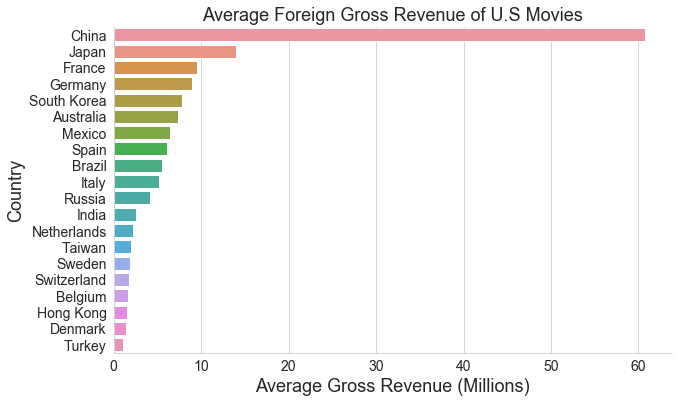

In [24]:
ax.clear() # clear ax from previous runs

fig2,ax1 = plt.subplots(figsize=(10,6))
# ax1.scatter(avg_prod,avg_gross_per_movie)
sns.barplot(avg_gross_x_trans,avg_gross_y, ax = ax1)

#labels
plt.ylabel('Country')
plt.xlabel('Average Gross Revenue (Millions)')
plt.title('Average Foreign Gross Revenue of U.S Movies')

#get rid of top and right graph borders
sns.despine()

#fonts
c

plt.show()


# Graph Actor Count Data By Countries
1. Subset scraped data for desired countrys 'China,Japan,France' since top 3 from previous
2. Graph the count of all appearances oversees
3. Graph individual counts of appearances in certain countries

In [13]:
#subset frames
actor_dataframe = boxmojo[boxmojo['Market'].isin(['China','Japan','France'])][['Market','Actor 1','Actor 2','Actor 3','Actor 4']]
actor_dataframe

,Market,Actor 1,Actor 2,Actor 3,Actor 4
8,France,Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chris Hemsworth
45,Japan,Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chris Hemsworth
55,China,Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chris Hemsworth
63,France,Donald Glover,Beyoncé,Seth Rogen,Chiwetel Ejiofor
100,Japan,Donald Glover,Beyoncé,Seth Rogen,Chiwetel Ejiofor
...,...,...,...,...,...
84229,Japan,Brendan Fraser,Rachel Weisz,John Hannah,Arnold Vosloo
84243,France,Kevin Spacey,Annette Bening,Thora Birch,Wes Bentley
84256,France,Mike Myers,Heather Graham,Michael York,Robert Wagner
84291,Japan,Mike Myers,Heather Graham,Michael York,Robert Wagner


In [14]:
#store each actor column into own frame
first = actor_dataframe[['Market','Actor 1']].rename(columns = {'Actor 1': 'Actor'})
second = actor_dataframe[['Market','Actor 2']].rename(columns = {'Actor 2': 'Actor'})
third = actor_dataframe[['Market','Actor 3']].rename(columns = {'Actor 3': 'Actor'})
fourth =actor_dataframe[['Market','Actor 4']].rename(columns = {'Actor 4': 'Actor'})

#concat 4 frames stacking horizontally
concat_actors_df = pd.concat([first,second,third,fourth],ignore_index = True)
concat_actors_df

,Market,Actor
0,France,Robert Downey Jr.
1,Japan,Robert Downey Jr.
2,China,Robert Downey Jr.
3,France,Donald Glover
4,Japan,Donald Glover
...,...,...
13711,Japan,Arnold Vosloo
13712,France,Wes Bentley
13713,France,Robert Wagner
13714,Japan,Robert Wagner


In [15]:
#Group by actors and sort from big to small
concat_actors_df.groupby('Actor').count().sort_values(by= 'Market', ascending = False)[:10]

,Market
Actor,
Dwayne Johnson,57
Johnny Depp,55
Matt Damon,54
Tom Cruise,53
Samuel L. Jackson,51
Liam Neeson,50
Hugh Jackman,49
Mark Wahlberg,45
Angelina Jolie,45


In [16]:
#subset only China market and sort the count number of actors
china_cast = concat_actors_df[concat_actors_df['Market'] == 'China']['Actor']

#return top 5 actors
count_china = china_cast.value_counts()[:5]

#store x and y for bar plot
chn_y = list(count_china.values)
chn_x = list(count_china.index[:5])
count_china

Tom Cruise        13
Dwayne Johnson    13
Hugh Jackman      11
Chris Evans       10
Jason Statham     10
Name: Actor, dtype: int64

In [17]:
#subet only France market and sort the count number of actors
france_cast = concat_actors_df[concat_actors_df['Market'] == 'France']['Actor']
count_france = france_cast.value_counts()[:5]

#store x and y for bar plot
fran_y = list(count_france.values)
fran_x = list(count_france.index[:5])
count_france

Dwayne Johnson    26
Johnny Depp       24
Matt Damon        24
Mark Wahlberg     23
Liam Neeson       23
Name: Actor, dtype: int64

In [18]:
#subset only japan market and sort the count number actors
japan_cast = concat_actors_df[concat_actors_df['Market'] == 'Japan']['Actor']
count_japan = japan_cast.value_counts()[:5]
#store x and y for bar plot              
jap_y = list(count_japan.values)
jap_x = list(count_japan.index[:5])
count_japan

Johnny Depp          22
Matt Damon           22
Tom Cruise           20
Tom Hanks            19
Samuel L. Jackson    19
Name: Actor, dtype: int64

In [ ]:
#action movies = less talky talky
#action actors = $$

# Graphing all the plots

In [19]:
#grab total of all foriegn values
overall = concat_actors_df.groupby('Actor').count().sort_values(by= 'Market', ascending = False)[:10].reset_index()
overall[:10]

,Actor,Market
0,Dwayne Johnson,57
1,Johnny Depp,55
2,Matt Damon,54
3,Tom Cruise,53
4,Samuel L. Jackson,51
5,Liam Neeson,50
6,Hugh Jackman,49
7,Mark Wahlberg,45
8,Angelina Jolie,45
9,Tom Hanks,45


In [20]:
#store x and y of overall for bar plot
tot_y = overall['Market'].values
tot_x = overall['Actor'].values

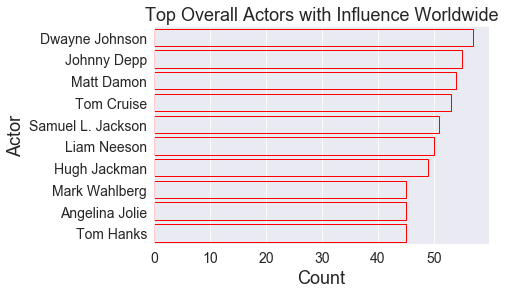

In [25]:
ax = sns.barplot(tot_y,tot_x, fill = None, edgecolor = 'red')
sns.set_style(style = 'darkgrid')
# sns.color_palette()
ax.set_title('Top Overall Actors with Influence Worldwide')
ax.set_ylabel('Actor')
ax.set_xlabel('Count')
# ax.set_yticklabels(tot_y, rotation = 0)

# plt.rc('font', size = 14)
plt.rc('axes', titlesize=18, )     # fontsize of the axes title
plt.rc('axes', labelsize= 18)  # fontsize of the x and y labels
plt.rc('xtick', labelsize = 14)    # fontsize of the tick labels
plt.rc('ytick', labelsize = 14)

plt.show()

In [150]:
# #table showing top counts
# concat_actors_df_test = concat_actors_df
# concat_actors_df_test['Count'] = concat_actors_df_test['Market']
# a = concat_actors_df_test.groupby(['Market','Actor']).count()

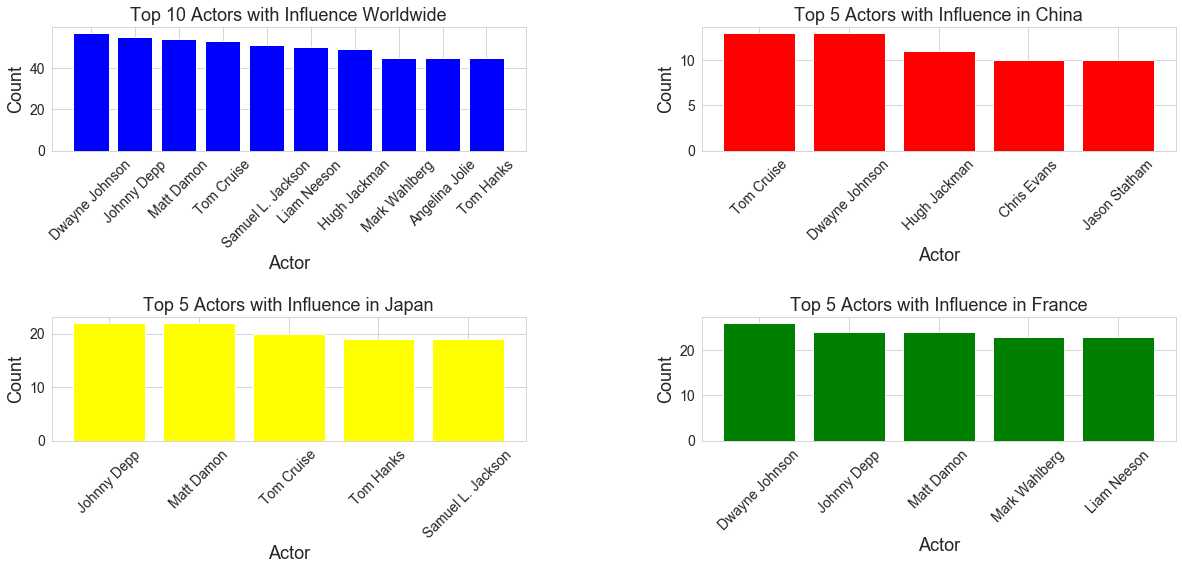

In [28]:
# ax.clear() # clear ax from previous runs
fig, ax = plt.subplots(2,2,figsize = (20,10))
plt.tight_layout(pad = 14.0)
ax1 = ax[0][0]
ax2 = ax[0][1]
ax3 = ax[1][0]
ax4 = ax[1][1]

#total/overall count plot
ax1.bar(tot_x,tot_y, color = 'blue') #plot total
ax1.set_title('Top 10 Actors with Influence Worldwide') #title
ax1.set_xlabel('Actor')   #label x and y
ax1.set_ylabel('Count')
ax1.set_xticklabels(tot_x, rotation = 45)  #label and rotate x labels

#China
ax2.bar(chn_x,chn_y, color = 'red')
ax2.set_title('Top 5 Actors with Influence in China')
ax2.set_xlabel('Actor')
ax2.set_ylabel('Count')
ax2.set_xticklabels(chn_x, rotation = 45)

#Japan
ax3.bar(jap_x,jap_y, color = 'yellow')
ax3.set_title('Top 5 Actors with Influence in Japan')
ax3.set_xlabel('Actor')
ax3.set_ylabel('Count')
ax3.set_xticklabels(jap_x, rotation = 45)
# ax3.set_yticklabels([18,20,22,24])

#France
ax4.bar(fran_x,fran_y, color = 'green')
ax4.set_title('Top 5 Actors with Influence in France')
ax4.set_xlabel('Actor')
ax4.set_ylabel('Count')
ax4.set_xticklabels(fran_x, rotation = 45)
# ax4.set_yticklabels([26,2])
plt.show()